Single-channel CSC
==================

This example demonstrates solving a convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

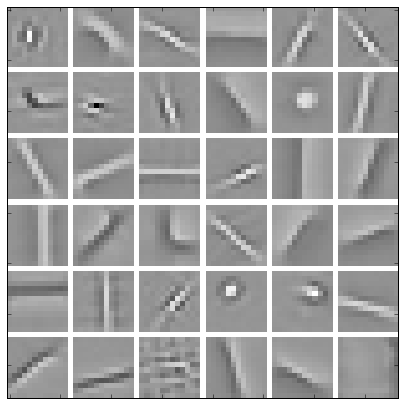

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 5e-2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     r         s         ρ         
----------------------------------------------------------------


   0  7.31e+01  8.03e-01  1.45e+03  8.61e-01  2.50e-01  3.50e+00
   1  5.99e+01  3.39e+00  1.13e+03  4.83e-01  4.18e-01  3.50e+00


   2  6.37e+01  3.81e+00  1.20e+03  3.22e-01  2.77e-01  3.16e+00
   3  5.73e+01  3.84e+00  1.07e+03  2.68e-01  2.05e-01  2.86e+00


   4  4.97e+01  4.13e+00  9.12e+02  2.27e-01  1.51e-01  2.86e+00
   5  4.68e+01  4.49e+00  8.45e+02  1.84e-01  1.13e-01  2.86e+00


   6  4.42e+01  4.73e+00  7.90e+02  1.44e-01  9.63e-02  2.86e+00
   7  4.20e+01  4.85e+00  7.44e+02  1.17e-01  8.34e-02  2.86e+00


   8  4.09e+01  4.90e+00  7.20e+02  9.81e-02  7.33e-02  2.86e+00
   9  3.94e+01  4.95e+00  6.90e+02  8.47e-02  6.19e-02  2.86e+00


  10  3.75e+01  5.02e+00  6.50e+02  7.33e-02  5.47e-02  2.86e+00
  11  3.61e+01  5.10e+00  6.20e+02  6.33e-02  5.07e-02  2.86e+00


  12  3.51e+01  5.17e+00  6.00e+02  5.55e-02  4.51e-02  2.86e+00
  13  3.44e+01  5.22e+00  5.84e+02  4.91e-02  3.97e-02  2.86e+00


  14  3.38e+01  5.26e+00  5.71e+02  4.34e-02  3.63e-02  2.86e+00
  15  3.31e+01  5.29e+00  5.56e+02  3.88e-02  3.35e-02  2.86e+00


  16  3.26e+01  5.31e+00  5.45e+02  3.68e-02  3.03e-02  2.58e+00
  17  3.22e+01  5.33e+00  5.37e+02  3.34e-02  2.74e-02  2.58e+00


  18  3.18e+01  5.35e+00  5.28e+02  3.04e-02  2.55e-02  2.58e+00
  19  3.14e+01  5.37e+00  5.21e+02  2.78e-02  2.36e-02  2.58e+00


  20  3.11e+01  5.39e+00  5.14e+02  2.56e-02  2.15e-02  2.58e+00
  21  3.07e+01  5.41e+00  5.07e+02  2.36e-02  2.01e-02  2.58e+00


  22  3.04e+01  5.42e+00  5.00e+02  2.28e-02  1.91e-02  2.36e+00
  23  3.02e+01  5.43e+00  4.96e+02  2.12e-02  1.79e-02  2.36e+00


  24  3.01e+01  5.43e+00  4.93e+02  1.98e-02  1.65e-02  2.36e+00
  25  2.99e+01  5.44e+00  4.88e+02  1.85e-02  1.55e-02  2.36e+00


  26  2.96e+01  5.44e+00  4.83e+02  1.73e-02  1.46e-02  2.36e+00
  27  2.94e+01  5.45e+00  4.79e+02  1.62e-02  1.37e-02  2.36e+00


  28  2.92e+01  5.46e+00  4.74e+02  1.52e-02  1.29e-02  2.36e+00
  29  2.89e+01  5.48e+00  4.69e+02  1.43e-02  1.23e-02  2.36e+00


  30  2.88e+01  5.49e+00  4.66e+02  1.42e-02  1.17e-02  2.13e+00
  31  2.87e+01  5.50e+00  4.65e+02  1.35e-02  1.10e-02  2.13e+00


  32  2.87e+01  5.50e+00  4.64e+02  1.28e-02  1.03e-02  2.13e+00
  33  2.86e+01  5.50e+00  4.62e+02  1.21e-02  9.78e-03  2.13e+00


  34  2.85e+01  5.51e+00  4.59e+02  1.15e-02  9.40e-03  2.13e+00
  35  2.83e+01  5.51e+00  4.56e+02  1.09e-02  9.04e-03  2.13e+00


  36  2.82e+01  5.52e+00  4.53e+02  1.04e-02  8.64e-03  2.13e+00
  37  2.81e+01  5.52e+00  4.51e+02  9.88e-03  8.25e-03  2.13e+00


  38  2.80e+01  5.53e+00  4.49e+02  9.42e-03  7.89e-03  2.13e+00
  39  2.79e+01  5.53e+00  4.47e+02  8.97e-03  7.52e-03  2.13e+00


  40  2.78e+01  5.54e+00  4.46e+02  8.55e-03  7.19e-03  2.13e+00
  41  2.78e+01  5.54e+00  4.44e+02  8.15e-03  6.89e-03  2.13e+00


  42  2.77e+01  5.54e+00  4.43e+02  7.78e-03  6.65e-03  2.13e+00
  43  2.76e+01  5.55e+00  4.41e+02  7.83e-03  6.40e-03  1.94e+00


  44  2.76e+01  5.55e+00  4.40e+02  7.55e-03  6.10e-03  1.94e+00
  45  2.75e+01  5.55e+00  4.40e+02  7.27e-03  5.79e-03  1.94e+00


  46  2.75e+01  5.55e+00  4.39e+02  6.99e-03  5.55e-03  1.94e+00
  47  2.74e+01  5.56e+00  4.37e+02  6.71e-03  5.36e-03  1.94e+00


  48  2.73e+01  5.56e+00  4.36e+02  6.43e-03  5.18e-03  1.94e+00
  49  2.73e+01  5.56e+00  4.34e+02  6.18e-03  4.99e-03  1.94e+00


  50  2.72e+01  5.56e+00  4.33e+02  5.94e-03  4.82e-03  1.94e+00
  51  2.72e+01  5.57e+00  4.32e+02  5.71e-03  4.63e-03  1.94e+00


  52  2.71e+01  5.57e+00  4.31e+02  5.50e-03  4.46e-03  1.94e+00
  53  2.71e+01  5.57e+00  4.30e+02  5.29e-03  4.31e-03  1.94e+00


  54  2.71e+01  5.58e+00  4.30e+02  5.10e-03  4.15e-03  1.94e+00
  55  2.70e+01  5.58e+00  4.29e+02  4.91e-03  4.01e-03  1.94e+00
----------------------------------------------------------------
ConvBPDN solve time: 9.35s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.38dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

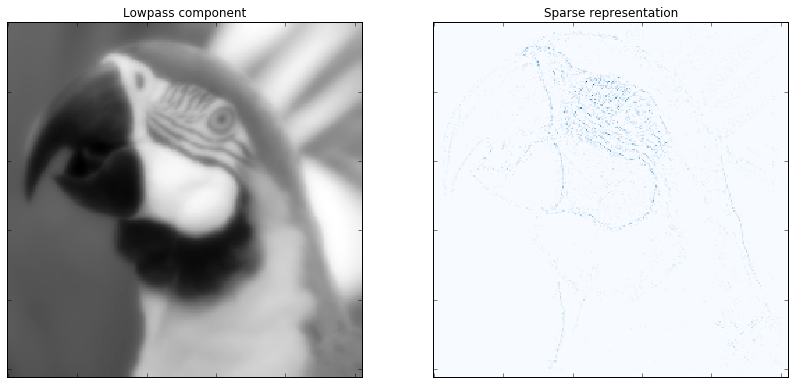

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

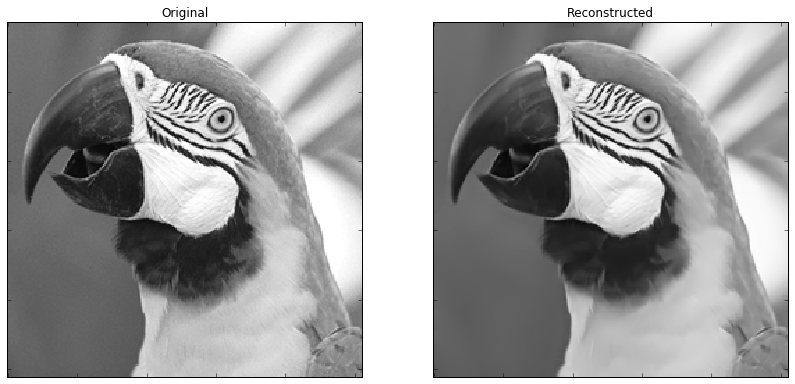

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

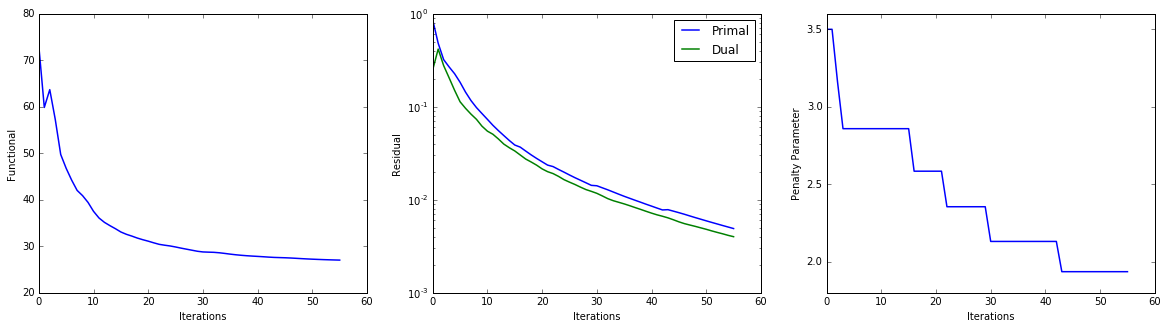

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fig=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, fig=fig,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'])
plot.subplot(1, 3, 3)
plot.plot(its.Rho, fig=fig, xlbl='Iterations', ylbl='Penalty Parameter')
fig.show()